# HSE 2024: Mathematical Methods for Data Analysis

## Seminar 2: Exploratory Data Analysis

In [51]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# set plot's style
sns.set_style('darkgrid')

#### Installing WGET

To load the data from the internet we will use **wget** library

A package could be installed using Jupyter interface by using [pip](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-pip) *magic function* which will install the package for current python kernel

In [22]:
pip install wget

Now let's use wget to load the dataset for today's practicals:

In [23]:
# importing the library
import wget

# store the web link in a variable
url = 'https://docs.google.com/uc?export=download&id=1k21iUIrz0NjfiLE_j-oBQm1bNu3wASX6'

# download the file and save its name to a viriable
filename = wget.download(url)

# print the filename
filename

'train_home_price (1).csv'

## House Prices Dataset

The dataset we are going to work with is a reincarnation of another famous house prices dataset that students around the world used to practice statistical learning for about 20+ years.

**Dataset description**

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

More information, analysis and code is available at <a href="https://www.kaggle.com/c/house-prices-advanced-regression-techniques">Kaggle</a>

In [24]:
# loading the data from pc
data = pd.read_csv(filename, index_col=0)

# help(pd.read_csv)
# look at the first 5 rows of the file
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Let's have a look at the complete list of available features:

In [25]:
data.columns.tolist()

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

As we can see, there are quite a lot of them. How many?

In [26]:
data.shape

(1460, 80)

Here is a complete description of these features:
    
* **SalePrice:** the property's sale price in dollars. This is the **target variable** that you're trying to predict.

* **MSSubClass:** The building class
* **MSZoning:** The general zoning classification
* **LotFrontage:** Linear feet of street connected to property
* **LotArea:** Lot size in square feet
* **Street:** Type of road access
* **Alley:** Type of alley access
* **LotShape:** General shape of property
* **LandContour:** Flatness of the property
* **Utilities:** Type of utilities available
* **LotConfig:** Lot configuration
* **LandSlope:** Slope of property
* **Neighborhood:** Physical locations within Ames city limits
* **Condition1:** Proximity to main road or railroad
* **Condition2:** Proximity to main road or railroad (if a second is present)
* **BldgType:** Type of dwelling
* **HouseStyle:** Style of dwelling
* **OverallQual:** Overall material and finish quality
* **OverallCond:** Overall condition rating
* **YearBuilt:** Original construction date
* **YearRemodAdd:** Remodel date
* **RoofStyle:** Type of roof
* **RoofMatl:** Roof material
* **Exterior1st:** Exterior covering on house
* **Exterior2nd:** Exterior covering on house (if more than one material)
* **MasVnrType:** Masonry veneer type
* **MasVnrArea:** Masonry veneer area in square feet
* **ExterQual:** Exterior material quality
* **ExterCond:** Present condition of the material on the exterior
* **Foundation:** Type of foundation
* **BsmtQual:** Height of the basement
* **BsmtCond:** General condition of the basement
* **BsmtExposure:** Walkout or garden level basement walls
* **BsmtFinType1:** Quality of basement finished area
* **BsmtFinSF1:** Type 1 finished square feet
* **BsmtFinType2:** Quality of second finished area (if present)
* **BsmtFinSF2:** Type 2 finished square feet
* **BsmtUnfSF:** Unfinished square feet of basement area
* **TotalBsmtSF:** Total square feet of basement area
* **Heating:** Type of heating
* **HeatingQC:** Heating quality and condition
* **CentralAir:** Central air conditioning
* **Electrical:** Electrical system
* **1stFlrSF:** First Floor square feet
* **2ndFlrSF:** Second floor square feet
* **LowQualFinSF:** Low quality finished square feet (all floors)
* **GrLivArea:** Above grade (ground) living area square feet
* **BsmtFullBath:** Basement full bathrooms
* **BsmtHalfBath:** Basement half bathrooms
* **FullBath:** Full bathrooms above grade
* **HalfBath:** Half baths above grade
* **Bedroom:** Number of bedrooms above basement level
* **Kitchen:** Number of kitchens
* **KitchenQual:** Kitchen quality
* **TotRmsAbvGrd:** Total rooms above grade (does not include bathrooms)
* **Functional:** Home functionality rating
* **Fireplaces:** Number of fireplaces
* **FireplaceQu:** Fireplace quality
* **GarageType:** Garage location
* **GarageYrBlt:** Year garage was built
* **GarageFinish:** Interior finish of the garage
* **GarageCars:** Size of garage in car capacity
* **GarageArea:** Size of garage in square feet
* **GarageQual:** Garage quality
* **GarageCond:** Garage condition
* **PavedDrive:** Paved driveway
* **WoodDeckSF:** Wood deck area in square feet
* **OpenPorchSF:** Open porch area in square feet
* **EnclosedPorch:** Enclosed porch area in square feet
* **3SsnPorch:** Three season porch area in square feet
* **ScreenPorch:** Screen porch area in square feet
* **PoolArea:** Pool area in square feet
* **PoolQC:** Pool quality
* **Fence:** Fence quality
* **MiscFeature:** Miscellaneous feature not covered in other categories
* **MiscVal:** Value of miscellaneous feature
* **MoSold:** Month Sold
* **YrSold:** Year Sold
* **SaleType:** Type of sale
* **SaleCondition:** Condition of sale

Let's check the data types:

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

As we can see, there are a lot of categorical features. At the same time, the quality of the data raises questions - too many missing values. Let's see how many specifically:

In [28]:
np.round(data.isna().sum()[data.isna().any()] / data.shape[0], 2)

,0
LotFrontage,0.18
Alley,0.94
MasVnrType,0.60
MasVnrArea,0.01
BsmtQual,0.03
BsmtCond,0.03
BsmtExposure,0.03
BsmtFinType1,0.03
BsmtFinType2,0.03
Electrical,0.00


What could we do with **missing values**?

- **1. drop**
    - drop the whole column
    - drop the row


- **2. fill in the gaps**:
    - statistical: mean/mode/median/max/min/quantiles etc.
    - ML: use a column with missing values as a target variable, learn and predict missing values
    - constant, hot/cold deck imputation, interpolation

It is impossible to work with features with too many gaps, so let's drop them:

In [29]:
features_with_na = data.isna().sum()[data.isna().any()] / data.shape[0]
list_to_drop = features_with_na[features_with_na > 0.3].index.tolist()
list_to_drop

['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [30]:
data.drop(list_to_drop, axis=1, inplace=True)

For all other features, first, let's try to drop the rows with missing values and see how much data remains:

In [31]:
data.dropna().shape[0] / data.shape[0]

0.7493150684931507

If we did so, then about 75% of the data would remain. Not bad, this is an acceptable option.

Can we do better?
    
Let's see how much data will remain if we try to fill in the gaps in the LotFrontage feature:

In [32]:
data_ = data.copy()
# data_.LotFrontage.fillna(9999999, inplace = True)
data_.fillna({'LotFrontage': 9999999}, inplace = True)
data_.dropna().shape[0] / data.shape[0]

0.9164383561643835

Whoa! There will be 92% of the data left!

Let's see how we can fill in the gaps:

Here is the description of the feature:
    
* LotFrontage: Linear feet of street connected to property

Let's look at the correlation of the LotFrontage feature with the SalePrice target variable:

In [33]:
data.LotFrontage.corr(data.SalePrice)

np.float64(0.35179909657067804)

How the correlation will change as the gaps are filled with different methods?

In [34]:
list_to_check = [0, data.LotFrontage.min(), data.LotFrontage.max(), data.LotFrontage.mean(), data.LotFrontage.median(),\
                    data.LotFrontage.quantile(0.1), data.LotFrontage.quantile(0.25), data.LotFrontage.quantile(0.75),\
                    data.LotFrontage.quantile(0.9)]

list_of_names = ['0', 'min', 'max', 'mean', 'median', 'quantile 0.1', 'quantile 0.25', 'quantile 0.75', 'quantile 0.9']
list_of_methods = ['bfill', 'ffill']

In [35]:
for el in list_to_check:
    print('method: {}, correlation value: {:.4f}'.format(list_of_names[list_to_check.index(el)], \
                                                     data.LotFrontage.fillna(el).corr(data.SalePrice)))
for el in list_of_methods:
    print('method: {}, correlation value: {:.4f}'.format(el, \
                                                     data.LotFrontage.fillna(method=el).corr(data.SalePrice)))

method: 0, correlation value: 0.2096
method: min, correlation value: 0.2524
method: max, correlation value: 0.0813
method: mean, correlation value: 0.3349
method: median, correlation value: 0.3348
method: quantile 0.1, correlation value: 0.3035
method: quantile 0.25, correlation value: 0.3281
method: quantile 0.75, correlation value: 0.3307
method: quantile 0.9, correlation value: 0.3071
method: bfill, correlation value: 0.3028
method: ffill, correlation value: 0.2985


/tmp/ipython-input-3208101290.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.LotFrontage.fillna(method=el).corr(data.SalePrice)))


Average, median and quantiles better preserve correlation

But maybe we can do even better? Let's take a look at the graphs:

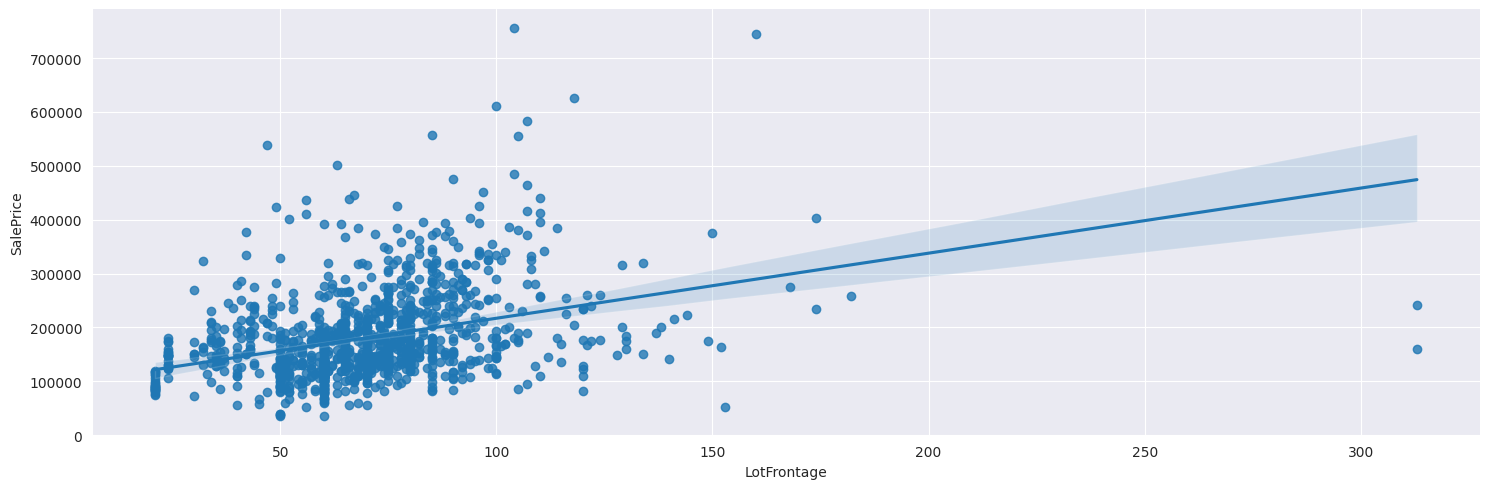

In [36]:
sns.lmplot(data=data, x='LotFrontage', y='SalePrice', aspect=3, height=5)
plt.show()

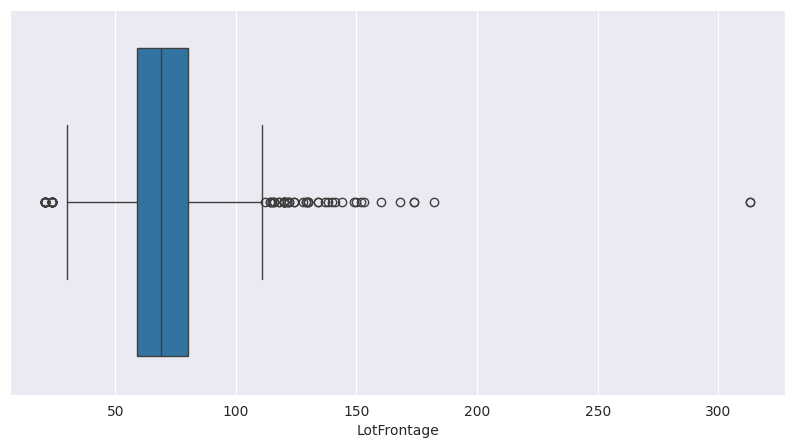

In [37]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data, x = 'LotFrontage')
plt.show()

Idea: let's break the target variable into bins by quantiles, for example, 10 percent quantiles, and look at the distributions of the LotFrontage feature broken down by these groups?

In [38]:
price_bins = data.SalePrice.quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
price_bins

,SalePrice
0.0,34900.0
0.1,106475.0
0.2,124000.0
0.3,135500.0
0.4,147000.0
0.5,163000.0
0.6,179280.0
0.7,198620.0
0.8,230000.0
0.9,278000.0


In [39]:
data['PriceGroups'] = pd.cut(data['SalePrice'], price_bins, \
                             labels=['0-0.1', '0.1-0.2', '0.2-0.3','0.3-0.4','0.4-0.5',\
                                     '0.5-0.6', '0.6-0.7', '0.7-0.8',\
                                     '0.8-0.9', '0.9-1'], right=True, include_lowest=True)

<Axes: xlabel='PriceGroups', ylabel='LotFrontage'>

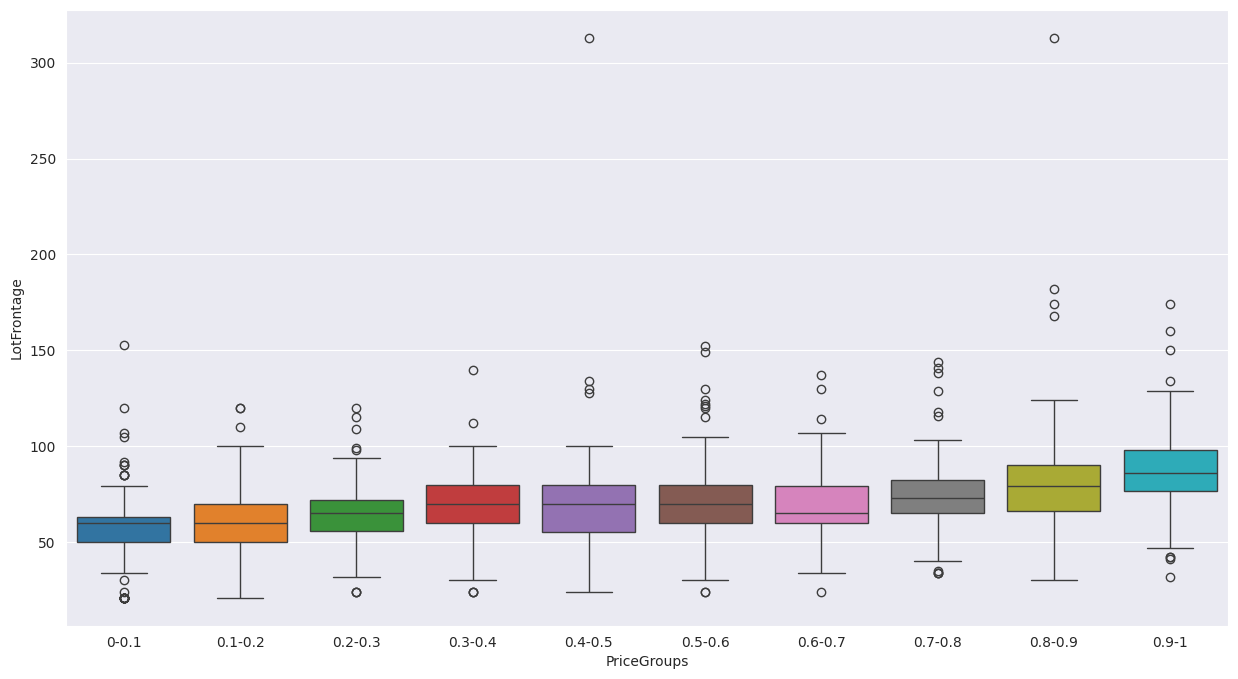

In [40]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=data, y='LotFrontage', x='PriceGroups', hue='PriceGroups')

Let's see what the correlation will be if we fill in the gaps with averages for these groups:

In [41]:
data.groupby('PriceGroups').LotFrontage.mean()

/tmp/ipython-input-608155722.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('PriceGroups').LotFrontage.mean()


,LotFrontage
PriceGroups,
0-0.1,56.362963
0.1-0.2,61.038760
0.2-0.3,64.480916
0.3-0.4,68.686441
0.4-0.5,68.909091
0.5-0.6,71.935185
0.6-0.7,68.783784
0.7-0.8,73.830357
0.8-0.9,81.565217


In [42]:
data.groupby(['PriceGroups']).LotFrontage.transform(lambda x: x.fillna(x.mean())).round(0).corr(data.SalePrice)

/tmp/ipython-input-2632789245.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(['PriceGroups']).LotFrontage.transform(lambda x: x.fillna(x.mean())).round(0).corr(data.SalePrice)


np.float64(0.36942232876896147)

As you can see, the correlation has increased. Let's focus on this option.

In [43]:
data.LotFrontage = data.groupby(['PriceGroups']).LotFrontage.transform(lambda x: x.fillna(x.mean())).round(0)

/tmp/ipython-input-444023323.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.LotFrontage = data.groupby(['PriceGroups']).LotFrontage.transform(lambda x: x.fillna(x.mean())).round(0)


The rate of the missing values for now:

In [44]:
data.isna().sum().shape[0] / data.shape[0]

0.05136986301369863

The remaining gaps can either be filled with something after conducting the appropriate analysis or simply dropped. I will drop it in this analysis, and your task is:
    
### Problem 1

Explore how you can fill in the remaining gaps in the data and show how this affects the correlation with the target variable.

In [45]:
def bestCorrelation(data):
    """
    Returns the best way to remove nulls from each numeric feature
    """

    numeric_features = data.select_dtypes(include=[np.number]).columns
    numeric_features = numeric_features[numeric_features != 'SalePrice']

    methods = {
        '0': lambda col : 0,
        'min': lambda col: col.min(),
        'max': lambda col: col.max(),
        'mean': lambda col: col.mean(),
        'median': lambda col: col.median(),
        'quantile 0.1': lambda col: col.quantile(0.1),
        'quantile 0.25': lambda col: col.quantile(0.25),
        'quantile 0.75': lambda col: col.quantile(0.75),
        'quantile 0.9': lambda col: col.quantile(0.9),
        'bfill': 'bfill',
        'ffill': 'ffill'
    }

    res = {}

    for feature in numeric_features:
        if data[feature].isna().any():
            feature_res = {}

            for name, function in methods.items():
                if name == 'bfill':
                  newColumn = data[feature].bfill()
                elif name == 'ffill':
                  newColumn = data[feature].ffill()
                else:
                  val = function(data[feature].dropna())
                  newColumn = data[feature].fillna(val)

                feature_res[name] = {'val' : val, 'correlation': newColumn.corr(data.SalePrice)}

            best_method = max(feature_res.items(), key=lambda x: abs(x[1]['correlation']))

            res[feature] = {'method' : best_method[0], 'correlation' : best_method[1]['correlation'], 'val' : best_method[1]['val']}

    return res

In [46]:
# Edit

# So we have found that after dropping the columns with too many nulls
# LotFrontage still has a pretty high percentage of nulls (0.18)

features_with_na = data.isna().sum()[data.isna().any()] / data.shape[0]
print(features_with_na)

# Find best value to replace nan in numeric features
print(bestCorrelation(data))

# Replacing the values
copy = data.copy()
for feature, bestCor in bestCorrelation(data).items():
  copy[feature] = data[feature].fillna(bestCor['val'])

print(copy.isna().sum()[copy.isna().any()] / copy.shape[0])

data = copy



MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
dtype: float64
{'MasVnrArea': {'method': 'quantile 0.9', 'correlation': np.float64(0.4780199961449623), 'val': np.float64(335.0)}, 'GarageYrBlt': {'method': 'quantile 0.1', 'correlation': np.float64(0.5199714306176345), 'val': np.float64(1945.0)}}
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
dtype: float64


In [47]:
data.dropna(inplace=True)

Let's look at the distribution of LotFrontage depending on the zones:

In [48]:
data.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

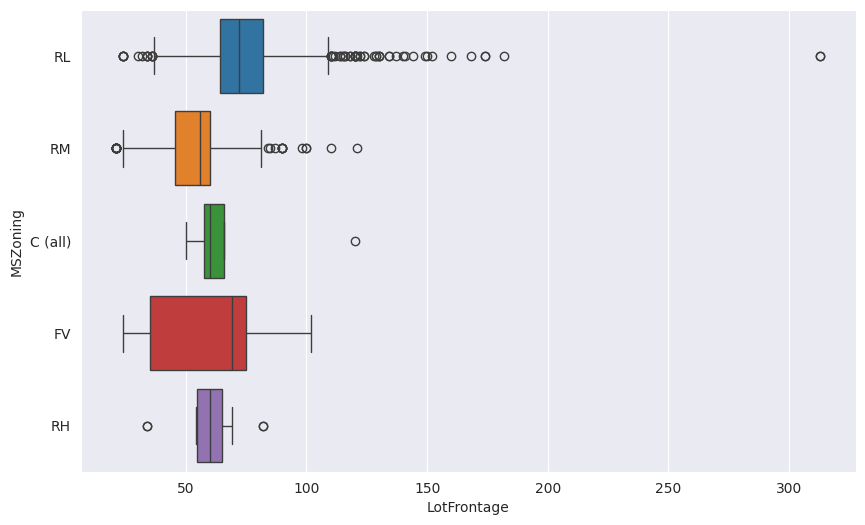

In [49]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='LotFrontage', y='MSZoning', hue='MSZoning')
plt.show()

### Problem 2

Fill in the nans in the LotFrontage column with some values by MSZoning zones. See how this affects the correlation with the target variable Sale Price

In [50]:
# Problem 2

data.groupby(['MSZoning']).LotFrontage.transform(lambda x: x.fillna(x.mean())).round(0).corr(data.SalePrice)
# Correlation is 0.34 - better than when we filled nans by priceBins

data.LotFronrage = data.groupby(['MSZoning']).LotFrontage.transform(lambda x: x.fillna(x.mean())).round(0).corr(data.SalePrice)

print(data.LotFrontage.corr(data.SalePrice))
# 0.35

data.dropna()

0.361392064590361


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PriceGroups
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,208500,0.7-0.8
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,181500,0.6-0.7
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,223500,0.7-0.8
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,140000,0.3-0.4
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,250000,0.8-0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,8,2007,WD,Normal,175000,0.5-0.6
1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2010,WD,Normal,210000,0.7-0.8
1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,2500,5,2010,WD,Normal,266500,0.8-0.9


Let's now look at the distribution of house prices

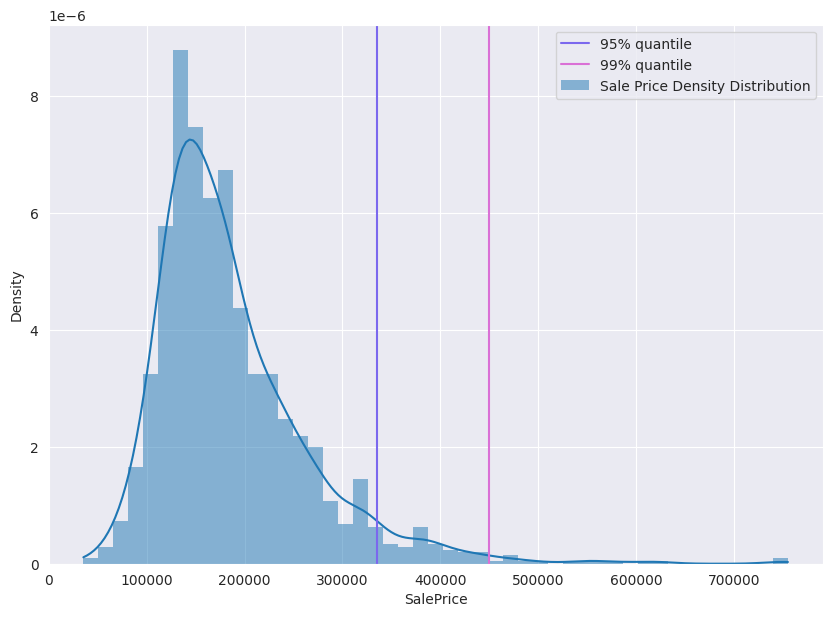

In [52]:
plt.subplots(figsize=(10,7))
sns.histplot(data['SalePrice'], label='Sale Price Density Distribution', kde=True, stat="density", linewidth=0)
plt.axvline(data.SalePrice.quantile(0.95), label='95% quantile', c='mediumslateblue')
plt.axvline(data.SalePrice.quantile(0.99), label='99% quantile', c='orchid')
plt.legend()
plt.show()

At the chart above we can see a long thin tail on the right side of the plot - it is "outliers", the points that lie behind 95 and 99 quantiles.

It makes sense to drop these outliers:

In [53]:
data = data.loc[data.SalePrice < data.SalePrice.quantile(0.99)]
data.shape

(1332, 75)

Now let's take a look at the distribution of house prices by zones:

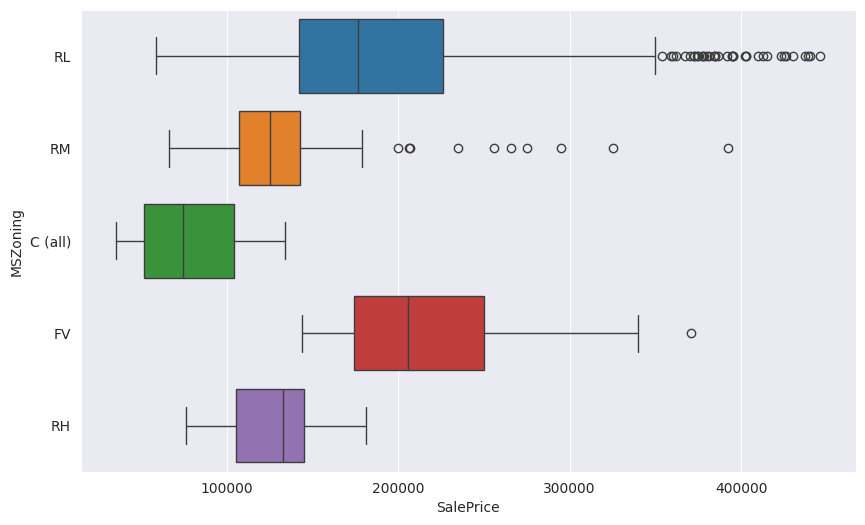

In [54]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='SalePrice', y='MSZoning', hue='MSZoning')
plt.show()

How do all the features correlate with the price and with each other?

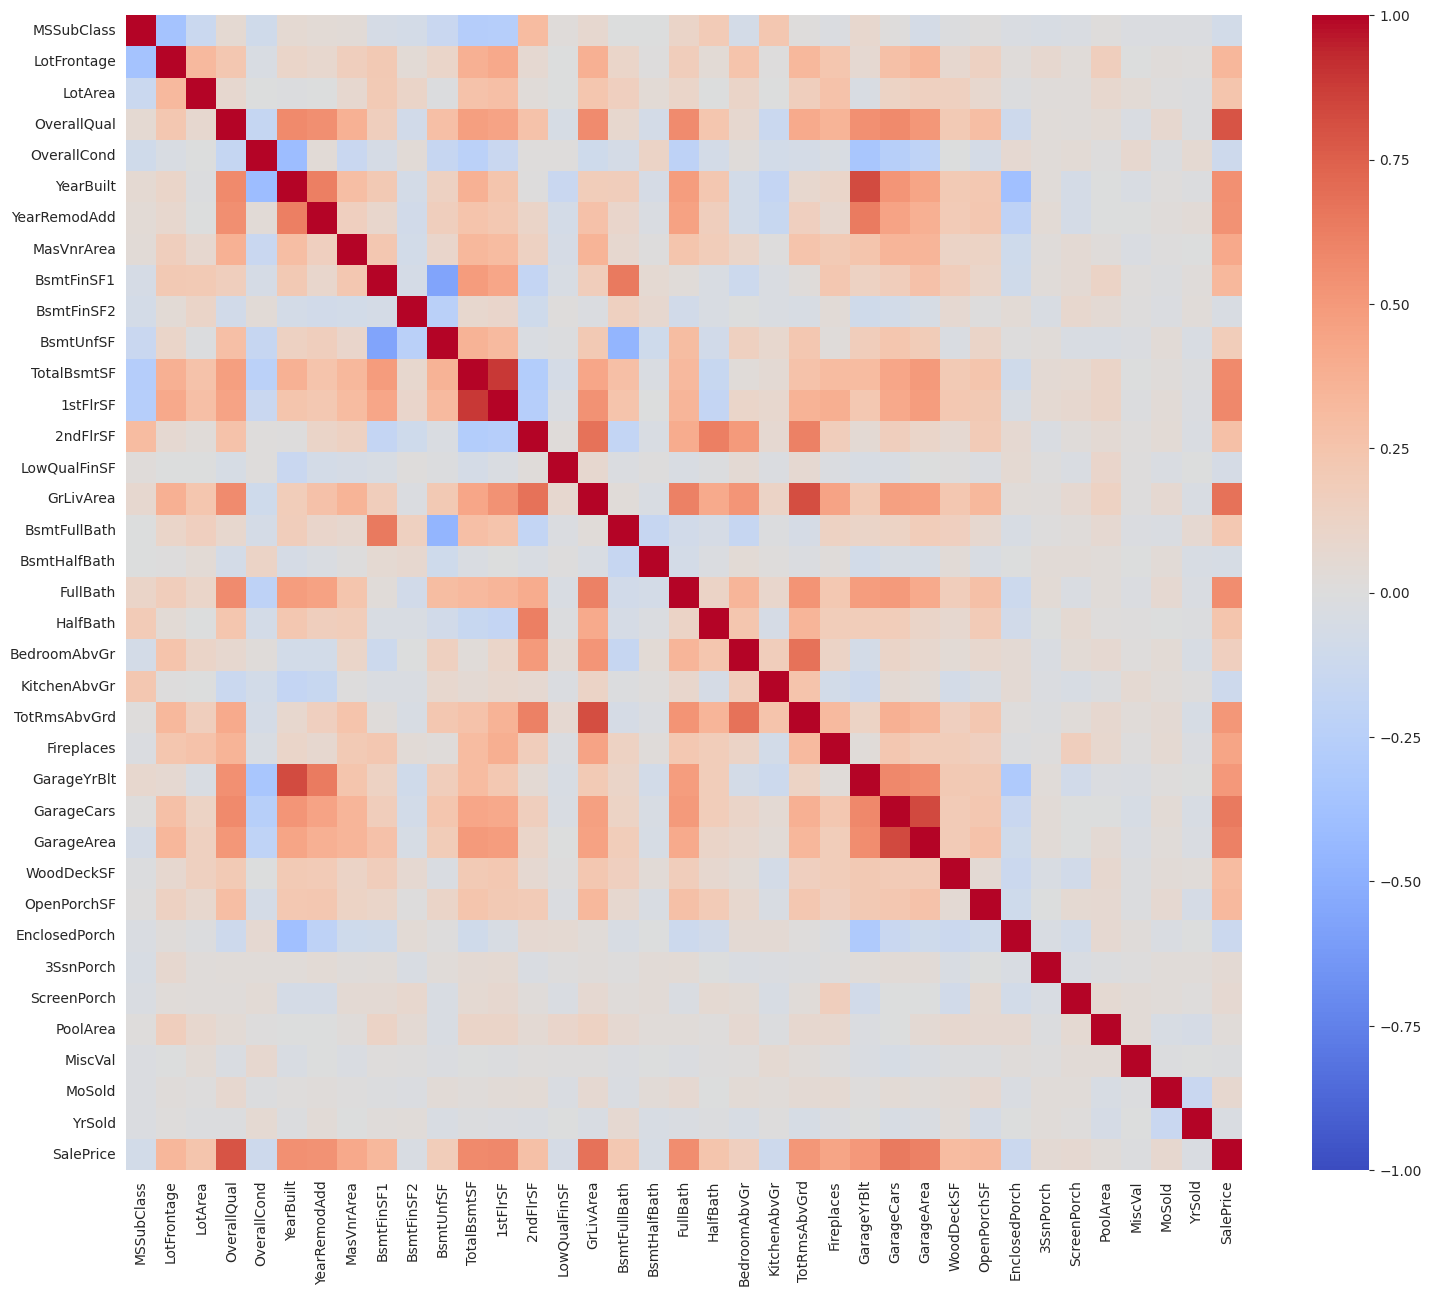

In [55]:
plt.subplots(figsize=(18,15))
sns.heatmap(data.select_dtypes(include=[float, int]).corr(), cmap=sns.color_palette("coolwarm", 10000), vmin=-1, center=0)
plt.show()

This is exactly the case when there are too many features and, consiquently, the plot become unreadable. In this case, you can draw plots distributed by groups or look at the first k features by correlation:

In [56]:
k = 8
corrmat = data.select_dtypes(include=[float, int]).corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index.tolist()
cols

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 '1stFlrSF',
 'TotalBsmtSF',
 'FullBath']

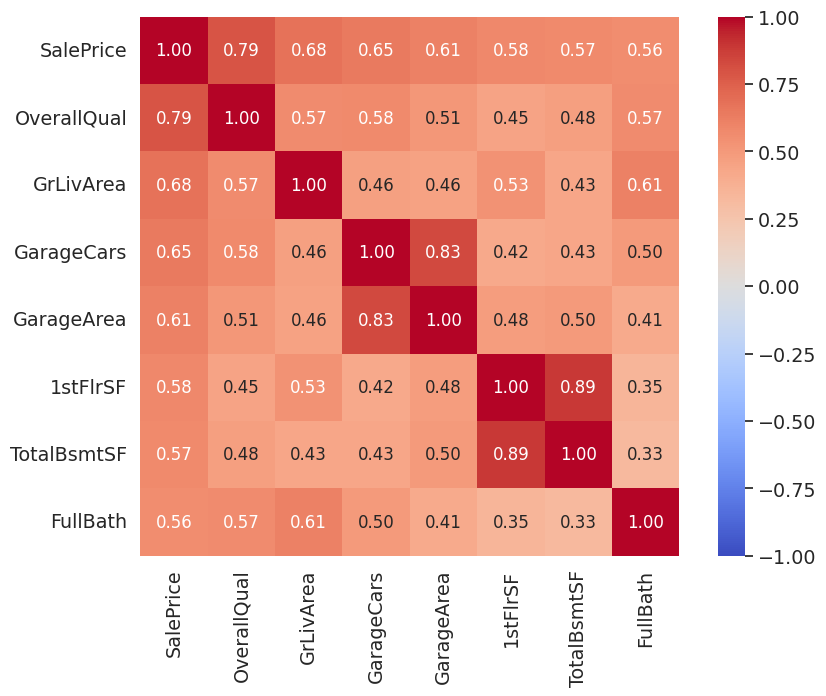

In [57]:
cm = np.corrcoef(data[cols].values.T)
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12},\
                yticklabels=cols, xticklabels=cols, vmin=-1, center=0,\
                    cmap=sns.color_palette('coolwarm',1000))
plt.show()

Let's now take a look at the graphs of pairwise dependences for the top 8 features by correlation:

In [58]:
cols.append('PriceGroups')

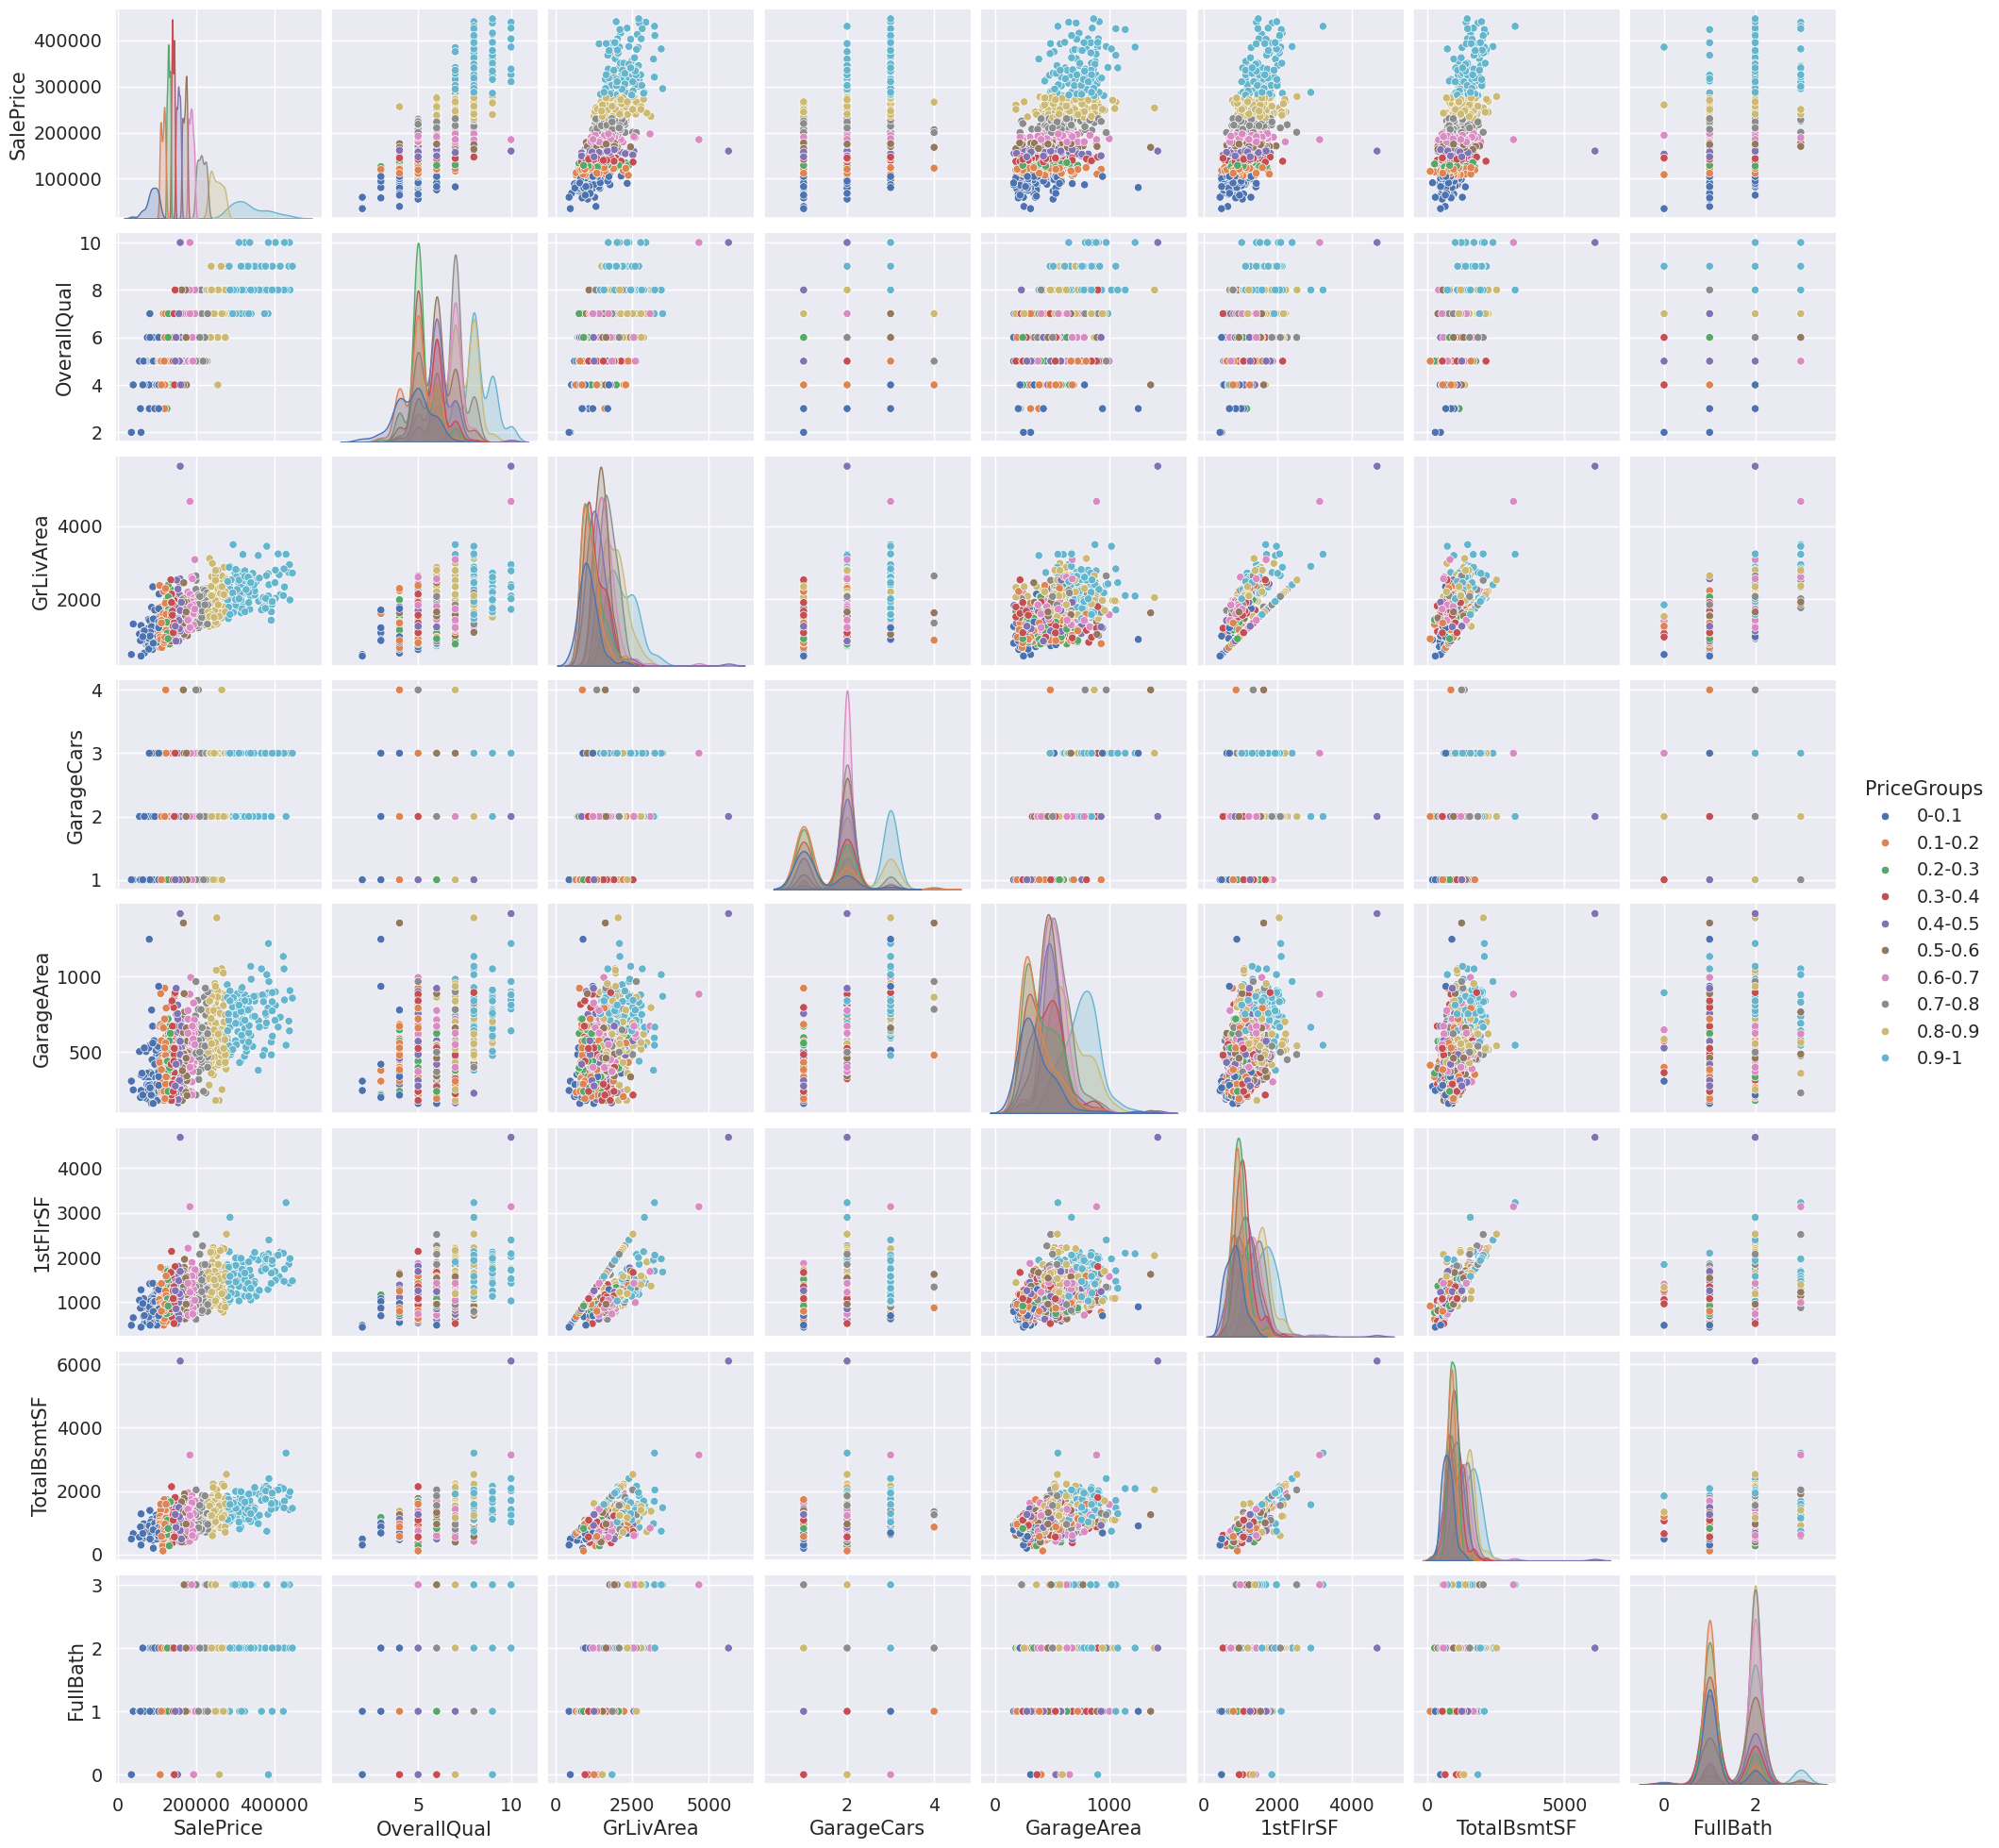

In [59]:
sns.pairplot(data=data[cols], hue='PriceGroups')
plt.show()

As you can see, the plots above is not particularly readable for two reasons: firstly, too many features are drawn at once, and secondly, the division by groups is too detailed.


### Problem 3

Add color markup to the plot above, depending on the division of the target variable into 4 or 5 quantiles. At the same time, draw only the top 5 features by correlation.

['0.7-0.8', '0.6-0.7', '0.3-0.4', '0.8-0.9', '0.9-1', '0.2-0.3', '0.1-0.2', '0.4-0.5', '0-0.1', '0.5-0.6']
Categories (10, object): ['0-0.1' < '0.1-0.2' < '0.2-0.3' < '0.3-0.4' ... '0.6-0.7' < '0.7-0.8' <
                          '0.8-0.9' < '0.9-1']


/tmp/ipython-input-3533016850.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['newPriceGroups'] = pd.cut(data['SalePrice'], price_bins, \


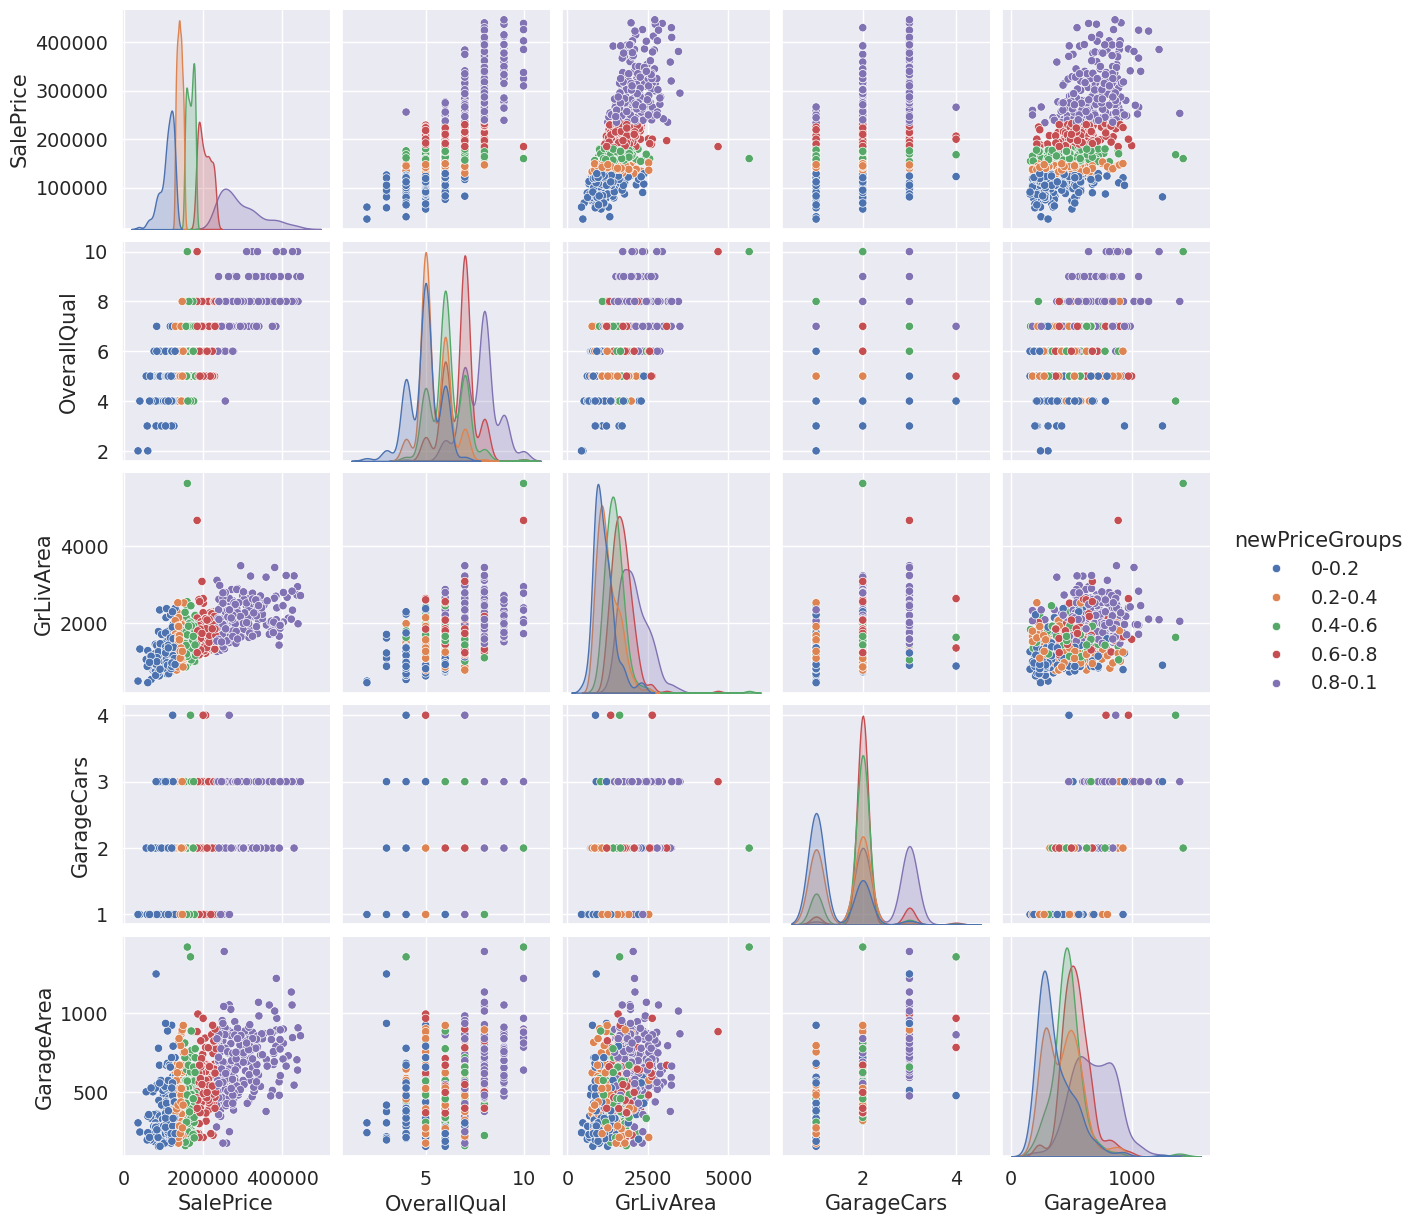

In [61]:
print(data.PriceGroups.unique())

price_bins = data.SalePrice.quantile([0, 0.2, 0.4, 0.6, 0.8, 1])

data['newPriceGroups'] = pd.cut(data['SalePrice'], price_bins, \
                             labels=['0-0.2', '0.2-0.4', '0.4-0.6','0.6-0.8','0.8-0.1'], right=True, include_lowest=True)

k = 5
corrmat = data.select_dtypes(include=[float, int]).corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index.tolist()

cols.append('newPriceGroups')

sns.pairplot(data=data[cols], hue='newPriceGroups')
plt.show()

Now let's take a look at the descriptive statistics of the top 5 features by correlation:

In [ ]:
data[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea']].describe()

Now let's look at descriptive statistics by categorical features:

In [ ]:
data.select_dtypes(include='object').describe()

SalePrice distribution by Overall quality

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='OverallQual', y="SalePrice")
plt.show()

SalePrice distribution by YearBuilt:

In [ ]:
plt.figure(figsize=(18, 8))
sns.boxplot(data=data, x='YearBuilt', y="SalePrice")
plt.xticks(rotation=90)
plt.show()

### Problem 4

The plot above is, again, an example of an overloaded plot. How to make it better? We could divide the years into groups by periods (3-year, 5-year, 10-year, etc.). Do it and make a plot

### Problem 5

Build boxplots or violinplots and / or pirplots, divided by different categorical features

We have already noted that the distribution of the target variable is similar to normal distribution. But is this exactly the case?

Let's try to fit the normal distribution to our data and plot the theoretical distribution along with our real distribution:

In [ ]:
from scipy import stats
from scipy.stats import norm

plt.figure(figsize=(10,7))
sns.distplot(data.SalePrice, fit=norm)

# fit the distribution
(mu, sigma) = norm.fit(data.SalePrice)

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice Density Distribution')

plt.figure(figsize=(10,7))
stats.probplot(data['SalePrice'], plot=plt)
plt.show()

As you can see in the plot above, our distribution is not entirely normal, i.e. it is skewed and has a higher density in the middle area than theoretical normal distribution. Let's make a monotonic conversion of the target variable and see if it gets better:

In [ ]:
# take a log og price
data['LogSalePrice'] = np.log1p(data.SalePrice)

plt.figure(figsize=(10,7))
sns.distplot(data.LogSalePrice, fit=norm)

# fir the distribution to the log of price
(mu, sigma) = norm.fit(data.LogSalePrice)

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Log of SalePrice Density Distribution')

plt.figure(figsize=(10,7))
stats.probplot(data.LogSalePrice, plot=plt)
plt.show()

much better now :)

# Splitting data into train and test sets + working with numeric features

Let's divide the data into **training** and **test samples**. For simplicity, we will not allocate an additional validation sample (although this is usually worth doing, it is necessary for the selection of hyperparameters of the model, that is, parameters that cannot be selected from the training sample). Additionally, we will have to separate the values of the target variable from the data.

In [ ]:
from sklearn.model_selection import train_test_split

y = data['LogSalePrice']
X = data.drop(columns=["SalePrice", 'LogSalePrice'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

Let's first look at the values of the **target variable**.

In [ ]:
sns.displot(y_train, height=5, aspect=2);

Judging by the histogram, we have examples with an atypically large cost, which may hinder us if our **loss function** *is too sensitive to outliers*. In the future, we will look at ways to minimize the damage from this.

Since we would like to train a classical **linear regression** model to solve our problem, it would be good to find the features that are "most linearly" related to the target variable, in other words, look at the **Pearson correlation coefficient** between the features and the target variable. Note that not all features are numeric, so we will not consider such features yet.

In [ ]:
numeric_data = X_train.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns

X_train = X_train.fillna(numeric_data_mean)
X_test = X_test.fillna(numeric_data_mean)

correlations = X_train[numeric_features].corrwith(y_train).sort_values(ascending=False)


plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(15, 10)

Let's look at the features from the top of the list. To do this, draw a graph of the dependence of the target variable on each of the features. On this chart, each point corresponds to a feature-target pair (such charts are called **scatter-plot**).

In [ ]:
fig, axs = plt.subplots(figsize=(16, 5), ncols=3)
for i, feature in enumerate(["GrLivArea", "GarageArea", "TotalBsmtSF"]):
    axs[i].scatter(X_train[feature], y_train, alpha=0.2)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("SalePrice")
plt.tight_layout()

We see that there is indeed a linear relationship between these features and the target variable.

# Our first model

Models from sklearn have the **fit** and **predict** methods. The first takes as input a training sample and a vector of target variables and trains the model, the second, being called after training the model, returns a prediction on the sample. Let's try to train our first model on the numerical features that we now have.

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train[numeric_features], y_train)
y_pred = model.predict(X_test[numeric_features])
y_train_pred = model.predict(X_train[numeric_features])

# print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
# print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred))
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred))

NameError: name 'X_train' is not defined

We trained our first model and  counted its quality on the test sample!

Now we will **scale** our features before training the model.

To do this, use the **StandardScaler transformer**. Transformers in sklearn have the **fit** and **transform** methods (and also fit_transform). The fit method takes a training sample as input and calculates the necessary values from it (for example, statistics such as StandardScaler: the average and standard deviation of each of the features). The transform method applies the transformation to the passed selection.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

# print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
# print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred))
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred))

Now we will use a very easy class **Pipeline**: training model is often represented as a sequence of certain actions with training and test samples (for example, first you need to scale the sample (and for the training samples need to apply the method *fit*, and for the test — *transform*), and then train model (*fit* for training and for test — *predict*). Pipeline allows you to store this sequence of steps and correctly processes different types of samples: both training and test.

In [ ]:
from sklearn.pipeline import Pipeline

simple_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('regression', LinearRegression())
])

model = simple_pipeline.fit(X_train[numeric_features], y_train)
y_pred = model.predict(X_test[numeric_features])

# print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred))

# Working with categorical features

Now we are clearly not using all the information we have from the data, simply because we do not use some of the features. These attributes in the dataset are *encoded in strings*, each of them denotes **a certain category**. Such features are called **categorical**. Let's highlight such features and immediately fill in the gaps in them with a special value (the fact that the feature has a missing value can itself be a good feature).

In [ ]:
categorical = list(X_train.dtypes[X_train.dtypes == "object"].index)
X_train[categorical] = X_train[categorical].fillna("NotGiven")
X_test[categorical] = X_test[categorical].fillna("NotGiven")

In [ ]:
X_train[categorical].sample(5)

Now we need to somehow encode these categorical features with numbers. Two standard transformers from sklearn for working with categorical features — **OrdinalEncoder** (simply renumbers the attribute values with natural numbers) and **OneHotEncoder**.

OneHotEncoder matches each feature with an entire vector consisting of zeros and one unit (which stands in the place corresponding to the accepted value, thus encoding it).

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', LinearRegression())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
# print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred))

Now we see that test RMSE has decreased! Hooray, that's all for today :)

The materials that were used and adopted for "sklearn part" of this seminar are as follows:
- Seminar 2 of Evgeny Sokolov ML course at 'ПМИ' for 3-rd year students https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/seminars/sem02-sklearn-linregr.ipynb
- scikit-learn official documentation https://scikit-learn.org/stable/index.html